In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# 60000張圖 28X28 pixel的圖片
# 將數值標準化
# reshape 讓他從 32 * 32 變成 784 * 1 的一維陣列
# 除以 255 讓我們標準化到 0-1 區間
x_train_shaped = x_train.reshape(60000, 784).astype("float32") / 255
x_test_shaped = x_test.reshape(10000, 784).astype("float32") / 255
# keras 要求你的分類輸出必須換成 One-hot 模式
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
# print("One-hot 前:", y_train[0])
# print("One-hot 後:", y_train_cat[0])

In [3]:
# # display result
# a = int(input("請輸入你想可視化的圖片 [0-59999]:"))
# print("你想可視化的圖片號碼是", a)
# print("圖片答案是", y_train[a])
# plt.imshow(x_train[a],cmap='gray')

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 中間層
h_layer = Dense(units = 256,input_dim = 784,kernel_initializer = "random_normal",activation = "relu")
model.add(h_layer)
# 輸出數字為 0~9
o_layer = Dense(units = 10,kernel_initializer = "random_normal",activation = "softmax")
model.add(o_layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [5]:
#  optimizer 先選 adam
model.compile(loss="categorical_crossentropy",optimizer = "adam", metrics = ['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat, 
                          validation_split = 0.1, epochs = 10, 
                          batch_size = 400,verbose = 2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.6139 - acc: 0.8374 - val_loss: 0.2167 - val_acc: 0.9380
Epoch 2/10
 - 1s - loss: 0.2272 - acc: 0.9350 - val_loss: 0.1502 - val_acc: 0.9580
Epoch 3/10
 - 1s - loss: 0.1666 - acc: 0.9506 - val_loss: 0.1280 - val_acc: 0.9623
Epoch 4/10
 - 1s - loss: 0.1289 - acc: 0.9632 - val_loss: 0.1070 - val_acc: 0.9692
Epoch 5/10
 - 1s - loss: 0.1038 - acc: 0.9693 - val_loss: 0.1036 - val_acc: 0.9702
Epoch 6/10
 - 1s - loss: 0.0869 - acc: 0.9741 - val_loss: 0.0906 - val_acc: 0.9745
Epoch 7/10
 - 1s - loss: 0.0723 - acc: 0.9786 - val_loss: 0.0825 - val_acc: 0.9760
Epoch 8/10
 - 1s - loss: 0.0613 - acc: 0.9819 - val_loss: 0.0815 - val_acc: 0.9763
Epoch 9/10
 - 1s - loss: 0.0503 - acc: 0.9855 - val_loss: 0.0779 - val_acc: 0.9787
Epoch 10/10
 - 1s - loss: 0.0435 - acc: 0.9872 - val_loss: 0.0760 - val_acc: 0.9773


預測標籤: [7, 2, 1, 0, 4]
正確標籤: [7, 2, 1, 0, 4]
10000/10000 [==============================] - 0s 16us/step
衡量係數: [0.081561855868157, 0.9759]
正確率: 97.59 %


,0,1,2,3,4,5,6,7,8,9
0,967,0,0,2,2,1,4,2,1,1
1,0,1126,2,1,0,1,2,0,3,0
2,5,3,1000,1,6,0,4,5,8,0
3,0,1,3,982,1,4,0,7,7,5
4,0,0,2,0,976,0,1,1,1,1
5,3,0,0,6,2,865,8,1,3,4
6,4,3,2,1,5,2,938,0,3,0
7,0,7,9,3,4,0,0,1000,1,4
8,3,0,2,5,4,4,3,3,946,4
9,2,5,0,4,26,2,1,6,4,959


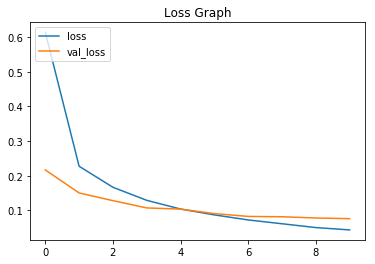

In [6]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")
pre = model.predict_classes(x_test_shaped)
print("預測標籤:", list(pre[:5]))
print("正確標籤:", list(y_test)[:5])
e = model.evaluate(x_test_shaped, y_test_cat)
print("衡量係數:", e)
print("正確率:", e[1] * 100, "%")
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))